In [38]:
import wavio
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [81]:
wav = wavio.read('White_Noise.wav')

In [82]:
left_channel = wav.data[:, 0]
right_channel = wav.data[:, 1]

In [83]:
red_image = np.array([left_channel[3*i] for i in range(int(len(left_channel)/3))])
green_image = np.array([left_channel[3*i + 1] for i in range(int(len(left_channel)/3))])
blue_image = np.array([left_channel[3*i + 2] for i in range(int(len(left_channel)/3))])

In [84]:
from functools import reduce

def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

In [85]:
red_crop = red_image[:int(np.sqrt(len(red_image)))**2]
green_crop = green_image[:int(np.sqrt(len(green_image)))**2]
blue_crop = blue_image[:int(np.sqrt(len(blue_image)))**2]

In [86]:
red_reshape = np.reshape(red_crop, (int(np.sqrt(len(red_crop))), int(np.sqrt(len(red_crop)))))
green_reshape = np.reshape(green_crop, (int(np.sqrt(len(green_crop))), int(np.sqrt(len(green_crop)))))
blue_reshape = np.reshape(blue_crop, (int(np.sqrt(len(blue_crop))), int(np.sqrt(len(blue_crop)))))

In [87]:
image = np.zeros((len(red_reshape), len(red_reshape), 3))
image[:, :, 0] = np.clip(red_reshape, 0, red_reshape.max())/red_reshape.max()
image[:, :, 1] = np.clip(green_reshape, 0, green_reshape.max())/green_reshape.max()
image[:, :, 2] = np.clip(blue_reshape, 0, blue_reshape.max())/blue_reshape.max()

In [88]:
left_clip = np.clip(left_channel, 0, left_channel.max())
left_crop = left_clip[:int(np.sqrt(len(left_clip)))**2]
left_reshape = np.reshape(left_crop, (int(np.sqrt(len(left_clip))), int(np.sqrt(len(left_clip)))))

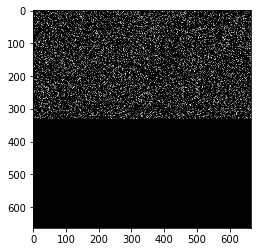

In [90]:
plt.imshow(left_reshape, cmap='gray')

In [93]:
from map_song import Map

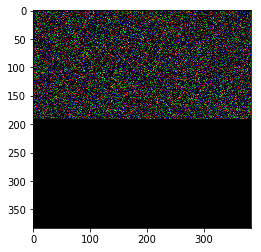

In [97]:
m = Map('White_Noise.wav')
plt.imshow(m.get_rgb_map(), cmap='gray')